# Introduction

## Description

This dataset comprises 1,529 patient samples collected from Jamalpur Medical College Hospital, Jamalpur, Bangladesh, from January 20, 2024, to January 1, 2025. The data were gathered following ethical guidelines, ensuring patient confidentiality and informed consent. The dataset provides a comprehensive collection of demographic, anthropometric, clinical, biochemical, and lifestyle parameters essential for assessing cardiovascular disease (CVD) risk and overall patient health.


The dataset includes a wide range of variables critical for CVD risk estimation, including basic demographic information, anthropometric measurements, clinical values, biochemical markers, and lifestyle factors. These variables are crucial for identifying risk factors, understanding disease progression, and developing preventive health strategies.

### Clinical Parameters Included:

Sex: Male or Female.

Age: Patient’s age (in years).

Weight (kg): Patient’s weight in kilograms.

Height (m): Patient’s height in meters.

BMI: Body Mass Index, calculated from weight and height.

Abdominal Circumference (cm): Measurement of abdominal girth.

BP: Blood pressure readings.

Total Cholesterol: Total cholesterol levels in the blood.

HDL: High-density lipoprotein levels.

Fasting Blood Sugar: Blood glucose levels after fasting.

Smoking Status: Indicates whether the patient is a smoker.

Diabetes Status: Indicates whether the patient has diabetes.

Physical Activity Level: Level of physical activity.

Family History of CVD: Indicates if there is a family history of cardiovascular diseases.

CVD Risk Level: Classification of the patient’s CVD risk level.

Height (cm): Patient’s height in centimeters.

Waist-to-Height Ratio: Ratio of waist circumference to height.

Systolic BP: Systolic blood pressure.

Diastolic BP: Diastolic blood pressure.

Blood Pressure Category: Classification of blood pressure levels.

Estimated LDL: Estimated low-density lipoprotein levels.

CVD Risk Score: Numerical score representing the patient’s CVD risk.


### Dataset Structure
Format: CSV
Rows: 1,529 (individual patient records)
Columns: 22 (including demographic, clinical, and lifestyle characteristics)

N.B. The data collection process was supported by the Cognitive AI & Informatics Research Lab (CAIR Lab), ensuring rigorous quality assessment and validation of the dataset.


### Source 
https://data.mendeley.com/datasets/d9scg7j8fp/1

## Load Data & Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://drive.google.com/uc?id=1vOQcv2J0lDos6uysQeLjYL5COUyY9dmB")
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


## Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [4]:
df.shape

(1529, 22)

In [5]:
df.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score'],
      dtype='object')

### Column data type analysis

In [6]:
obj_col = [x for x in df.columns if df[x].dtype=='object']
obj_col

['Sex',
 'Blood Pressure (mmHg)',
 'Smoking Status',
 'Diabetes Status',
 'Physical Activity Level',
 'Family History of CVD',
 'CVD Risk Level',
 'Blood Pressure Category']

*8 columns are object type*

***Target column can be "CVD Risk Level"***

In [7]:
num_col = [x for x in df.columns if df[x].dtype!='object']
num_col

['Age',
 'Weight (kg)',
 'Height (m)',
 'BMI',
 'Abdominal Circumference (cm)',
 'Total Cholesterol (mg/dL)',
 'HDL (mg/dL)',
 'Fasting Blood Sugar (mg/dL)',
 'Height (cm)',
 'Waist-to-Height Ratio',
 'Systolic BP',
 'Diastolic BP',
 'Estimated LDL (mg/dL)',
 'CVD Risk Score']

*14 columns are numeric*

### Identify & Handle Null values and Duplicate values

In [8]:
df.isnull().sum()

,0
Sex,0
Age,78
Weight (kg),81
Height (m),67
BMI,64
Abdominal Circumference (cm),67
Blood Pressure (mmHg),0
Total Cholesterol (mg/dL),73
HDL (mg/dL),80
Fasting Blood Sugar (mg/dL),67


In [9]:
df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending=False)

,0
Diastolic BP,82
Weight (kg),81
HDL (mg/dL),80
Waist-to-Height Ratio,79
Age,78
Height (cm),74
Total Cholesterol (mg/dL),73
Systolic BP,71
CVD Risk Score,70
Estimated LDL (mg/dL),69


In [10]:
df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending=False)/len(df) * 100

,0
Diastolic BP,5.362982
Weight (kg),5.297580
HDL (mg/dL),5.232178
Waist-to-Height Ratio,5.166776
Age,5.101373
Height (cm),4.839765
Total Cholesterol (mg/dL),4.774362
Systolic BP,4.643558
CVD Risk Score,4.578156
Estimated LDL (mg/dL),4.512753


In [11]:
df.isnull().sum().sum()

np.int64(1022)

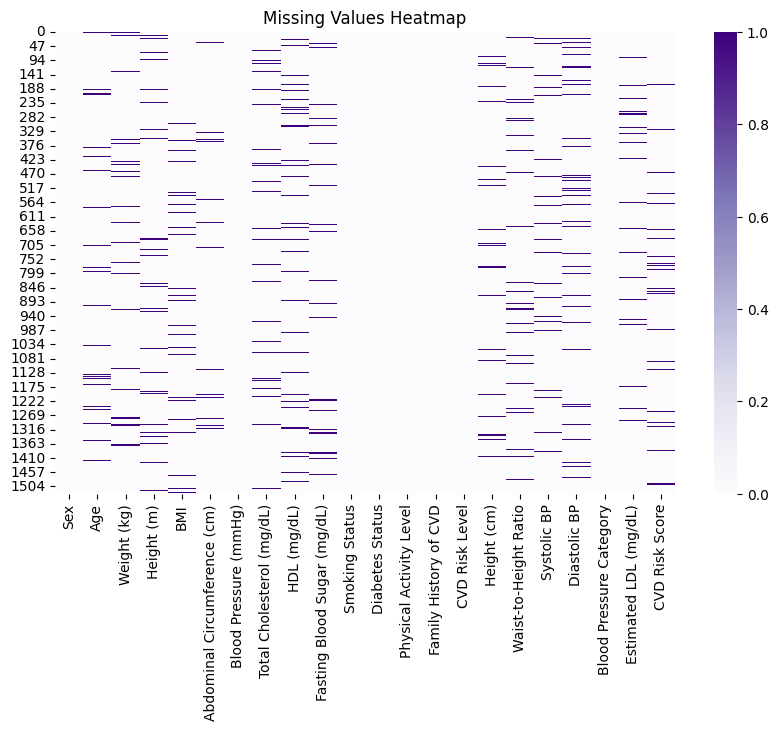

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap="Purples")
plt.title("Missing Values Heatmap")
plt.show()

#### Blood Pressure Metrics Null value handling

*Systolic BP measures the maximum pressure in the arteries when the heart contracts (beats) and pushes blood into circulation.*

- The left ventricle of the heart contracts → blood is ejected into the aorta.

- This surge of blood creates peak arterial pressure.

- That’s your Systolic BP (the “top” number).

*Diastolic BP measures the minimum pressure in the arteries when the heart relaxes between beats.*

- After contraction, the heart muscle relaxes and refills with blood.

- Blood flow slows, but the arteries stay slightly pressurized.

- That resting pressure is the Diastolic BP (the “bottom” number).

In [13]:
bp_split = df['Blood Pressure (mmHg)'].str.split('/', expand=True).astype(float)
df['Systolic BP'] = bp_split[0]
df['Diastolic BP'] = bp_split[1]
df.drop(columns=['Blood Pressure (mmHg)'], inplace=True)

#### Height, Weight, BMI Null value handling

In [14]:
print(df['Height (cm)'].median())
print(df['Weight (kg)'].median())
print(df['Height (m)'].median())

175.694
86.61449999999999
1.755


In [15]:
df['Height (cm)'] = df['Height (cm)'].fillna(df['Height (cm)'].median())
df['Weight (kg)'] = df['Weight (kg)'].fillna(df['Weight (kg)'].median())
df['Height (m)'] = df['Height (m)'].fillna(df['Height (m)'].median())

In [16]:
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
df['BMI'] = df['BMI'].round(1)

#### Cholesterol Metrics Null value handling

In [17]:
df['Total Cholesterol (mg/dL)'] = df['Total Cholesterol (mg/dL)'].fillna(df['Total Cholesterol (mg/dL)'].median())
df['HDL (mg/dL)'] = df['HDL (mg/dL)'].fillna(df['HDL (mg/dL)'].median())
df['Estimated LDL (mg/dL)'] = df['Estimated LDL (mg/dL)'].fillna(df['Estimated LDL (mg/dL)'].median())

#### Sugar related Columns Null value handling

In [18]:
df.groupby('Diabetes Status')['Fasting Blood Sugar (mg/dL)'].median()

,Fasting Blood Sugar (mg/dL)
Diabetes Status,
N,114.0
Y,117.0


In [19]:
df['Fasting Blood Sugar (mg/dL)'] = df['Fasting Blood Sugar (mg/dL)'].fillna(df.groupby('Diabetes Status')['Fasting Blood Sugar (mg/dL)'].transform('median'))

#### Age Column Null Value handling

In [20]:
df['Age'] = df['Age'].fillna(df['Age'].median())

#### Derived Ratios Null value handling

In [21]:
df['Waist-to-Height Ratio'] = df['Waist-to-Height Ratio'].fillna(df['Abdominal Circumference (cm)'] / df['Height (cm)'])

In [22]:
df[df['Waist-to-Height Ratio'].isnull()][['Waist-to-Height Ratio','Abdominal Circumference (cm)','Height (cm)']]

,Waist-to-Height Ratio,Abdominal Circumference (cm),Height (cm)
244,NaN,NaN,181.0
480,NaN,NaN,160.0


In [23]:
df['Waist-to-Height Ratio'] = df['Waist-to-Height Ratio'].fillna(df['Waist-to-Height Ratio'].median())

In [24]:
df['Abdominal Circumference (cm)'] = df['Abdominal Circumference (cm)'].fillna(df['Waist-to-Height Ratio']*df['Height (cm)'])

#### CD Risk Score Null values handling

In [25]:
df.groupby('CVD Risk Level')['CVD Risk Score'].mean()

,CVD Risk Score
CVD Risk Level,
HIGH,17.611323
INTERMEDIARY,16.133444
LOW,17.006419


In [26]:
df['CVD Risk Score'] = df['CVD Risk Score'].fillna(df.groupby('CVD Risk Level')['CVD Risk Score'].transform('mean'))

In [27]:
df.duplicated().sum()

np.int64(0)

#### Verification

In [28]:
df.isnull().sum().sum()

np.int64(0)

*No duplicated records found*

###    Identify & Handle Outliers

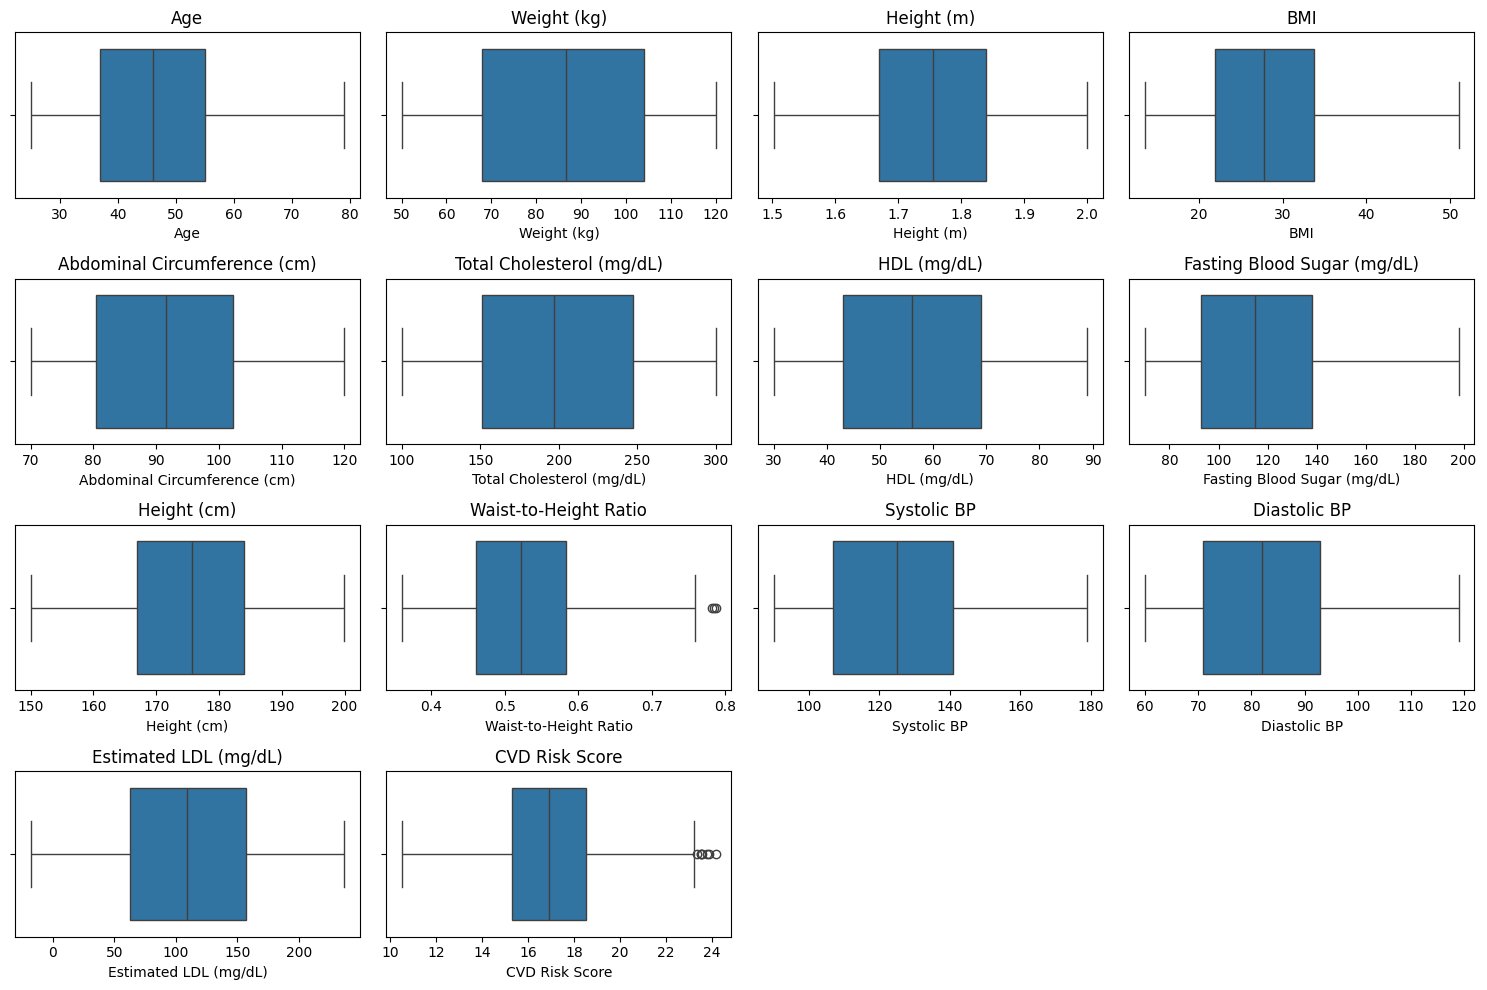

In [30]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_col, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
def outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_df = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers_df , lower_bound, upper_bound

In [37]:
for i in num_col:
    outliers_df, low, high = outliers(df, i)
    if not outliers_df.empty:
        print(f"Outliers in {i}: {len(outliers_df)} | Range: {low:.2f} - {high:.2f}")
        print(outliers_df[[i]])

Outliers in Waist-to-Height Ratio: 3 | Range: 0.28 - 0.77
      Waist-to-Height Ratio
1307                  0.782
1347                  0.784
1411                  0.787
Outliers in CVD Risk Score: 7 | Range: 10.46 - 23.34
      CVD Risk Score
316           24.170
428           23.580
575           23.880
605           23.510
1397          23.351
1413          23.797
1447          23.532


In [29]:
df['CVD Risk Level'].value_counts()/len(df)*100

,count
CVD Risk Level,
HIGH,47.612819
INTERMEDIARY,37.998692
LOW,14.388489
